<a href="https://colab.research.google.com/github/ayan123gorain/Krishicare/blob/branch1/Krishicare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
!unzip drive/MyDrive/Krishicare/archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: Image Data base/Image Data base/Tomato healthy/Tomato_healthy2938.jpg  
  inflating: Image Data base/Image Data base/Tomato healthy/Tomato_healthy2939.jpg  
  inflating: Image Data base/Image Data base/Tomato healthy/Tomato_healthy294.jpg  
  inflating: Image Data base/Image Data base/Tomato healthy/Tomato_healthy2940.jpg  
  inflating: Image Data base/Image Data base/Tomato healthy/Tomato_healthy2941.jpg  
  inflating: Image Data base/Image Data base/Tomato healthy/Tomato_healthy2942.jpg  
  inflating: Image Data base/Image Data base/Tomato healthy/Tomato_healthy2943.jpg  
  inflating: Image Data base/Image Data base/Tomato healthy/Tomato_healthy2944.jpg  
  inflating: Image Data base/Image Data base/Tomato healthy/Tomato_healthy2945.jpg  
  inflating: Image Data base/Image Data base/Tomato healthy/Tomato_healthy2946.jpg  
  inflating: Image Data base/Image Data base/Tomato healthy/Tomato_healthy2947.jpg  
  inflating: Im

In [3]:
import numpy as np
import pandas as pd
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import time
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
sns.set_style('darkgrid')
import shutil
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
import time

In [7]:
dir=r'/content/Image Data base/Image Data base'
min_samples=40 # set limit for minimum images a class must have to be included in the dataframe
filepaths = []
labels=[] 
classlist=os.listdir(dir)   
for klass in classlist:
    classpath=os.path.join(dir, klass)
    flist=os.listdir(classpath)
    if len(flist) >= min_samples:
        for f in flist:
            fpath=os.path.join(classpath,f)
            filepaths.append(fpath)
            labels.append(klass)
    else:
        print('class ', klass, ' has only', len(flist), ' samples and will not be included in dataframe')

class  Nitrogen deficiency in plant  has only 33  samples and will not be included in dataframe
class  Waterlogging in plant  has only 21  samples and will not be included in dataframe


In [8]:
Fseries=pd.Series(filepaths, name='filepaths')
Lseries=pd.Series(labels, name='labels')        
df=pd.concat([Fseries, Lseries], axis=1)
train_df, dummy_df=train_test_split(df, train_size=.9, shuffle=True, random_state=123, stratify=df['labels'])
valid_df, test_df=train_test_split(dummy_df, train_size=.5, shuffle=True, random_state=123, stratify=dummy_df['labels'])
print('train_df lenght: ', len(train_df), '  test_df length: ', len(test_df), '  valid_df length: ', len(valid_df))

train_df lenght:  179649   test_df length:  9981   valid_df length:  9981


In [9]:
classes=sorted(list(train_df['labels'].unique()))
class_count = len(classes)
print('The number of classes in the dataset is: ', class_count)
groups=train_df.groupby('labels')
print('{0:^30s} {1:^13s}'.format('CLASS', 'IMAGE COUNT'))

The number of classes in the dataset is:  56
            CLASS               IMAGE COUNT 


In [ ]:
countlist=[]
classlist=[]
for label in sorted(list(train_df['labels'].unique())):
    group=groups.get_group(label)
    countlist.append(len(group))
    classlist.append(label)
    print('{0:^30s} {1:^13s}'.format(label, str(len(group))))
    

In [11]:
max_value=np.max(countlist)
max_index=countlist.index(max_value)
max_class=classlist[max_index]
min_value=np.min(countlist)
min_index=countlist.index(min_value)
min_class=classlist[min_index]
print(max_class, ' has the most images= ',max_value, ' ', min_class, ' has the least images= ', min_value)

ht=0
wt=0

train_df_sample=train_df.sample(n=100, random_state=123,axis=0)
for i in range (len(train_df_sample)):
    fpath=train_df_sample['filepaths'].iloc[i]
    img=plt.imread(fpath)
    shape=img.shape
    ht += shape[0]
    wt += shape[1]
print('average height= ', ht//100, ' average width= ', wt//100, 'aspect ratio= ', ht/wt)

Orange Haunglongbing Citrus greening  has the most images=  47585   potassium deficiency in plant  has the least images=  49
average height=  263  average width=  261 aspect ratio=  1.0098039215686274


In [12]:
diseases = os.listdir(dir)
print(diseases)

['Corn (maize) healthy', 'Sogatella rice', 'Potato Early blight', 'Pepper bell Bacterial spot', 'Strawberry Leaf scorch', 'onion', 'Grape Esca Black Measles', 'Blueberry healthy', 'Apple Black rot', 'Tomato Tomato mosaic virus', 'Cherry (including_sour) healthy', 'Tomato Septoria leaf spot', 'Tomato Leaf Mold', 'potassium deficiency in plant', 'Grape Leaf blight Isariopsis Leaf Spot', 'Tomato Target Spot', 'Cherry (including sour) Powdery mildew', 'Soybean healthy', 'Tomato Bacterial spot', 'corn crop', 'cabbage looper', 'Nitrogen deficiency in plant', 'algal leaf in tea', 'Gray Leaf Spot in corn Leaf', 'anthracnose in tea', 'bird eye spot in tea', 'Apple Cedar apple rust', 'Pepper bell healthy', 'Tomato Early blight', 'Leaf smut in rice leaf', 'Blight in corn Leaf', 'Waterlogging in plant', 'Bacterial leaf blight in rice leaf', 'brown blight in tea', 'Peach healthy', 'Garlic', 'tomato canker', 'healthy tea leaf', 'Tomato Late blight', 'Grape Black rot', 'potato hollow heart', 'Raspber

In [13]:
print("Total disease classes are: {}".format(len(diseases)))

Total disease classes are: 58


In [14]:
def trim(df, max_samples, min_samples, column):
    df=df.copy()
    groups=df.groupby(column)    
    trimmed_df = pd.DataFrame(columns = df.columns)
    groups=df.groupby(column)
    for label in df[column].unique(): 
        group=groups.get_group(label)
        count=len(group)    
        if count > max_samples:
            sampled_group=group.sample(n=max_samples, random_state=123,axis=0)
            trimmed_df=pd.concat([trimmed_df, sampled_group], axis=0)
        else:
            if count>=min_samples:
                sampled_group=group        
                trimmed_df=pd.concat([trimmed_df, sampled_group], axis=0)
    print('after trimming, the maximum samples in any class is now ',max_samples, ' and the minimum samples in any class is ', min_samples)
    return trimmed_df



In [15]:
max_samples=200 # since each class has more than 200 images all classes will be trimmed to have 200 images per class
min_samples=36
column='labels'
train_df= trim(train_df, max_samples, min_samples, column)

after trimming, the maximum samples in any class is now  200  and the minimum samples in any class is  36


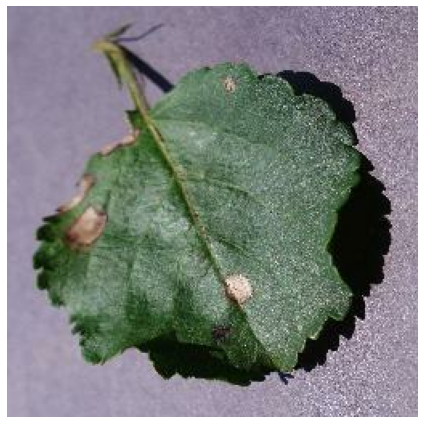

In [16]:
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')

image_path = '/content/Image Data base/Image Data base/Apple Black rot/Apple_Black_rot1002.jpg'
image = tf.io.read_file(image_path)
image = tf.io.decode_jpeg(image)

plt.figure(figsize=(6, 6))
plt.imshow(tf.squeeze(image), cmap='gray')
plt.axis('off')
plt.show();